<a href="https://colab.research.google.com/github/SrijaniDas-GitHub/Classification_problems/blob/SrijaniDas-GitHub-Classification-Problems/HR_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Source of this dataset


https://www.kaggle.com/vjchoudhary7/hr-analytics-case-study/

# About the data


Depending on the data available for the employees and attrition information (whether the employee has left the company on previous year or not), we need to be able to predict the probability of an employee to stay in the company.
Also this data should help us to reduce attrition rate focusing on the right factors.

# Importing Modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Loading the data

In [4]:
employee_survey = pd.read_csv("/content/datasets_42363_72602_employee_survey_data.csv")
manager_survey = pd.read_csv("/content/datasets_42363_72602_manager_survey_data.csv")
general_data = pd.read_csv("/content/datasets_42363_72602_general_data.csv")

In [5]:
print(employee_survey.columns)
print(manager_survey.columns)
print(general_data.columns)

Index(['EmployeeID', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance'],
      dtype='object')
Index(['EmployeeID', 'JobInvolvement', 'PerformanceRating'], dtype='object')
Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


We will merge the 3 datasets on the common column "EmployeeID" and work on a single dataset.

In [6]:
from functools import reduce
df_list = [employee_survey, manager_survey, general_data]
emp_df = reduce(lambda left,right: pd.merge(left,right,how='inner',on='EmployeeID'), df_list)
emp_df.columns

Index(['EmployeeID', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating', 'Age',
       'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'Gender', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'Over18', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

Let's have a quick look at the data we are going to analyze.

In [7]:
emp_df.shape

(4410, 29)

In [8]:
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
 4   JobInvolvement           4410 non-null   int64  
 5   PerformanceRating        4410 non-null   int64  
 6   Age                      4410 non-null   int64  
 7   Attrition                4410 non-null   object 
 8   BusinessTravel           4410 non-null   object 
 9   Department               4410 non-null   object 
 10  DistanceFromHome         4410 non-null   int64  
 11  Education                4410 non-null   int64  
 12  EducationField           4410 non-null   object 
 13  EmployeeCount            4410 non-null   int64  
 14  Gender                  

In [9]:
emp_df.describe()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Age,DistanceFromHome,Education,EmployeeCount,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4385.000000,4390.000000,4372.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,2205.500000,2.723603,2.728246,2.761436,2.729932,3.153741,36.923810,9.192517,2.912925,1.0,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,1273.201673,1.092756,1.101253,0.706245,0.711400,0.360742,9.133301,8.105026,1.023933,0.0,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,18.000000,1.000000,1.000000,1.0,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1103.250000,2.000000,2.000000,2.000000,2.000000,3.000000,30.000000,2.000000,2.000000,1.0,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,2205.500000,3.000000,3.000000,3.000000,3.000000,3.000000,36.000000,7.000000,3.000000,1.0,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,3307.750000,4.000000,4.000000,3.000000,3.000000,3.000000,43.000000,14.000000,4.000000,1.0,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,4410.000000,4.000000,4.000000,4.000000,4.000000,4.000000,60.000000,29.000000,5.000000,1.0,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [10]:
print(emp_df['Over18'].unique())
print(emp_df['EmployeeCount'].unique())
print(emp_df['StandardHours'].unique())

['Y']
[1]
[8]


By inspecting the features quickly, we can see that we can get rid of the following features for the mentioned reasons

*   EmployeeID - is a unique ID, Attrition rate does not depend on this
*   Over18 - has a single value for all columns (i.e. Y)
*   EmployeeCount - has a single value for all columns (i.e. 1)
*   StandardHours - has a single value for all columns (i.e. 8)



# Drop Unnecessary Features (Part 1)

In [11]:
# This function takes the dataframe and list of features to be dropped
# returns the updated dataframe

def drop_features(df, feat_list):
    for col in feat_list:
        if col in df.columns:
            df.drop(col, axis=1, inplace=True)
            print(f"{col} is dropped")
        else:
            print(f"{col} is already dropped")

In [12]:
drop_features(emp_df, ['EmployeeID', 'EmployeeCount', 'Over18', 'StandardHours'])

EmployeeID is dropped
EmployeeCount is dropped
Over18 is dropped
StandardHours is dropped


# Visualizing Categorical Data

Our target column is "Attrition"

Let's check out all the labeled columns in the dataframe
- We will list the categorical features
- get their position/column index
- see how target column "Attrition" is related with them

In [13]:
print("The categorical columns and their index-")
for col in emp_df.columns:
    if emp_df[col].dtype == 'object':
        print(col, emp_df.columns.get_loc(col))

The categorical columns and their index-
Attrition 6
BusinessTravel 7
Department 8
EducationField 11
Gender 12
JobRole 14
MaritalStatus 15


In [14]:
def show_percentage_of_people_left(column_name):
    df = emp_df.groupby(column_name)['Attrition'].describe()
    df['percentage of people left'] = (1 - (df['freq']/df['count']))*100
    print(df)
    print('===============================')

In [15]:
for col in ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']:
    show_percentage_of_people_left(col)

                  count unique top  freq percentage of people left
BusinessTravel                                                    
Non-Travel          450      2  No   414                         8
Travel_Frequently   831      2  No   624                   24.9097
Travel_Rarely      3129      2  No  2661                   14.9569
                       count unique top  freq percentage of people left
Department                                                             
Human Resources          189      2  No   132                   30.1587
Research & Development  2883      2  No  2430                   15.7128
Sales                   1338      2  No  1137                   15.0224
                 count unique top  freq percentage of people left
EducationField                                                   
Human Resources     81      2  No    48                   40.7407
Life Sciences     1818      2  No  1515                   16.6667
Marketing          477      2  No   402  

Let's visualize the categorical data in plots as well.

- For working with the categorical data, we need to encode them.
Onehotencoding will increase the number of features dramatically 
(for e.g. for the column 'JobRole', it will add 8 columns!)

- Understanding the trend of Attrition depending on the various labels would help us to bind similar labels together 
and thus reduce the column numbers.

- We will also reduce a column after the encoding to avoid dummy variable trap

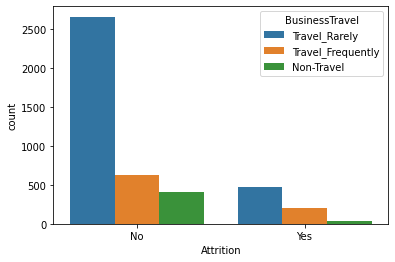

In [16]:
sns.countplot(x='Attrition', hue='BusinessTravel', data=emp_df)

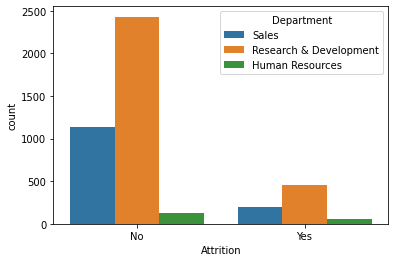

In [17]:
sns.countplot(x='Attrition', hue='Department', data=emp_df)

 **Observation** : Human Resource Department has quite higher attrition rate than others


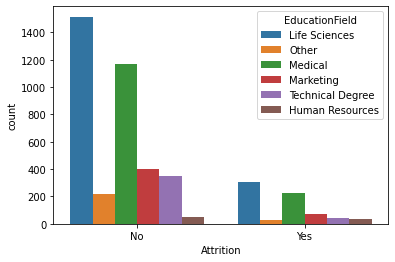

In [18]:
sns.countplot(x='Attrition', hue='EducationField', data=emp_df)

**Observation** : Human Resource has quite high attrition rate than others

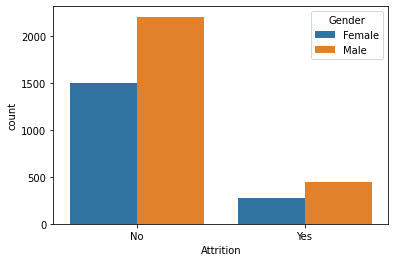

In [19]:
sns.countplot(x='Attrition', hue='Gender', data=emp_df)

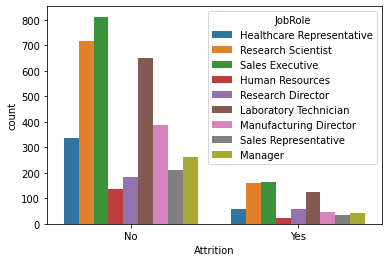

In [20]:
sns.countplot(x='Attrition', hue='JobRole', data=emp_df)

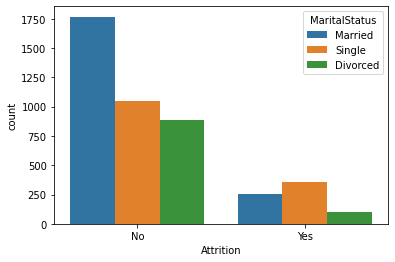

In [21]:
sns.countplot(x='Attrition', hue='MaritalStatus', data=emp_df)

# Encoding Categorical Data

**Encoding "MaritalStatus"**

We will encode this column "MaritalStatus" in a new column named "Single"

- Value : 1 means Single, Attrition rate 25% 
- Value : 0 means Married/Divorced, Attrition rate ~11% on average

In [25]:
emp_df['Single'] = pd.get_dummies(emp_df["MaritalStatus"])['Single']

**Encoding "JobRole"**

```

Let's divide this into 3 categories-
1st:
Research Director           240      2  No  183                     23.75
2nd:
Laboratory Technician       777      2  No  651                   16.2162
Research Scientist          876      2  No  717                   18.1507
Sales Executive             978      2  No  813                   16.8712
3rd:
Healthcare Representative   393      2  No  336                   14.5038
Human Resources             156      2  No  135                   13.4615
Manager                     306      2  No  264                   13.7255
Manufacturing Director      435      2  No  387                   11.0345
Sales Representative        249      2  No  213                   14.4578

Column Representation-
RD    LT_RS_SE  
1     0        - means 1st category (Attrition rate 23%)
0     1        - means 2nd category (avg. Attrition rate 17%)
0     0        - means 3rd category (avg. Attrition rate 13%)

```
Using the first line of code to avoid the warning as below

C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Ref link:

https://www.dataquest.io/blog/settingwithcopywarning/

Here it is safe to ignore this error as we do want to update our original dataframe.


In [26]:
pd.set_option('mode.chained_assignment', None)

emp_df['RD'] = np.zeros(emp_df.shape[0])
emp_df['LT_RS_SE'] = np.zeros(emp_df.shape[0])

for row_num in range(0, emp_df.shape[0]):
    if emp_df['JobRole'][row_num] == 'Research Director':
        emp_df['RD'][row_num] = 1
    if emp_df['JobRole'][row_num] in ['Laboratory Technician', 'Research Scientist', 'Sales Executive']:
        emp_df['LT_RS_SE'][row_num] = 1

In [28]:
emp_df['Male'] = pd.get_dummies(emp_df["Gender"])["Male"]

# In EducationField
# HR : Avg Attrition Rate 40 %
# Others : Avg Attrition Rate 14 %
emp_df["EducationField_HR"] = pd.get_dummies(emp_df["EducationField"], prefix='EducationField')["EducationField_Human Resources"]

# In Department
# HR : Avg Attrition Rate 30 %
# Others : Avg Attrition Rate 15 %

emp_df["Department_HR"] = pd.get_dummies(emp_df["Department"], prefix='Department')["Department_Human Resources"]

emp_df["Travel_Frequently"] = pd.get_dummies(emp_df["BusinessTravel"])["Travel_Frequently"]
emp_df["Travel_Rarely"] = pd.get_dummies(emp_df["BusinessTravel"])["Travel_Rarely"]

emp_df["Attrition_Yes"] = pd.get_dummies(emp_df["Attrition"], prefix='Attrition')["Attrition_Yes"]

Now that all our categorical columns as encoded, we can remove the original columns.

# Drop Unnecessary Features (Part 2)

In [29]:
drop_features(emp_df, ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Attrition'])

BusinessTravel is dropped
Department is dropped
EducationField is dropped
Gender is dropped
JobRole is dropped
MaritalStatus is dropped
Attrition is dropped


In [30]:
emp_df.shape

(4410, 27)

In [31]:
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EnvironmentSatisfaction  4385 non-null   float64
 1   JobSatisfaction          4390 non-null   float64
 2   WorkLifeBalance          4372 non-null   float64
 3   JobInvolvement           4410 non-null   int64  
 4   PerformanceRating        4410 non-null   int64  
 5   Age                      4410 non-null   int64  
 6   DistanceFromHome         4410 non-null   int64  
 7   Education                4410 non-null   int64  
 8   JobLevel                 4410 non-null   int64  
 9   MonthlyIncome            4410 non-null   int64  
 10  NumCompaniesWorked       4391 non-null   float64
 11  PercentSalaryHike        4410 non-null   int64  
 12  StockOptionLevel         4410 non-null   int64  
 13  TotalWorkingYears        4401 non-null   float64
 14  TrainingTimesLastYear   

# Study Correlation of the features

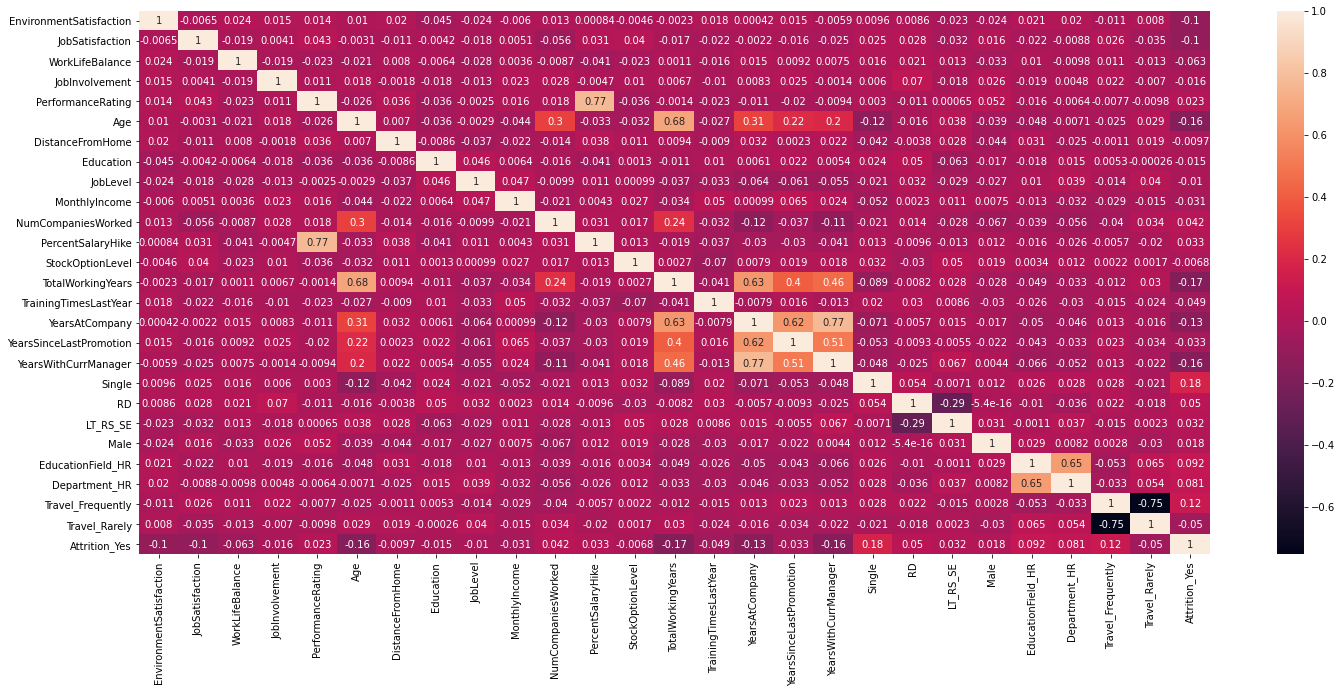

In [32]:
plt.figure(figsize=(24,10))
sns.heatmap(emp_df.corr(), annot=True)

**Observations :**
- "DistanceFromHome" and "StockOptionLevel" are barely correlated with Attrition, hence can be removed
- "PercentageSalaryHike" is highly correlated with "PerformanceRating", "PercentageSalaryHike" can be removed
- "YearsAtCompany", "YearsSinceLastPromotion", "YearsWithCurrManager", "TotalWorkingYears" are highly correlated
- Removing "YearsSinceLastPromotion", "YearsWithCurrManager", "TotalWorkingYears"
- Keeping both HR columns (education field and department) as other educational fields/dept.s won't be considered otherwise
- Keeping both travel_frequently and travel_rarely, as we will lose non_travel data otherwise

# Drop Unnecessary Features (Part 3)

In [33]:
drop_features(emp_df, ["DistanceFromHome", "StockOptionLevel", "PercentSalaryHike", "YearsSinceLastPromotion", "YearsWithCurrManager", "TotalWorkingYears"])

DistanceFromHome is dropped
StockOptionLevel is dropped
PercentSalaryHike is dropped
YearsSinceLastPromotion is dropped
YearsWithCurrManager is dropped
TotalWorkingYears is dropped


In [34]:
emp_df.shape

(4410, 21)

In [35]:
emp_df.columns

Index(['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating', 'Age', 'Education', 'JobLevel',
       'MonthlyIncome', 'NumCompaniesWorked', 'TrainingTimesLastYear',
       'YearsAtCompany', 'Single', 'RD', 'LT_RS_SE', 'Male',
       'EducationField_HR', 'Department_HR', 'Travel_Frequently',
       'Travel_Rarely', 'Attrition_Yes'],
      dtype='object')

# Visualizing Numerical Data

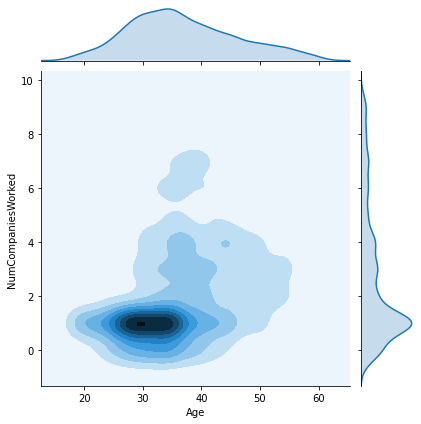

In [38]:
sns.jointplot(emp_df['Age'], emp_df['NumCompaniesWorked'], data=emp_df, kind='kde')

**Observation :** Most employees have worked in 1-2 companies, aged between 28-35 (roughly).

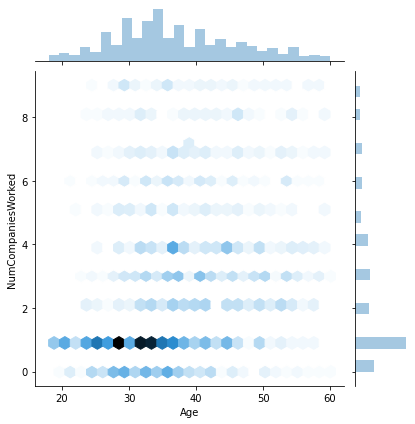

In [39]:
sns.jointplot(emp_df['Age'], emp_df['NumCompaniesWorked'], data=emp_df, kind='hex')

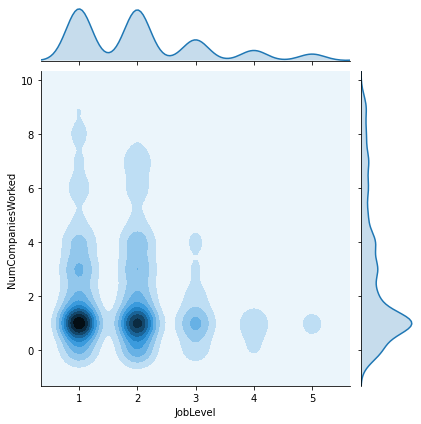

In [40]:
sns.jointplot(emp_df['JobLevel'], emp_df['NumCompaniesWorked'], data=emp_df, kind='kde')

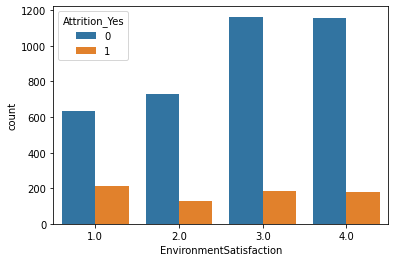

In [41]:
sns.countplot(emp_df['EnvironmentSatisfaction'], hue=emp_df['Attrition_Yes'], data=emp_df)

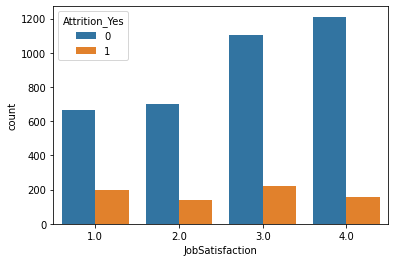

In [42]:
sns.countplot(emp_df['JobSatisfaction'], hue=emp_df['Attrition_Yes'], data=emp_df)

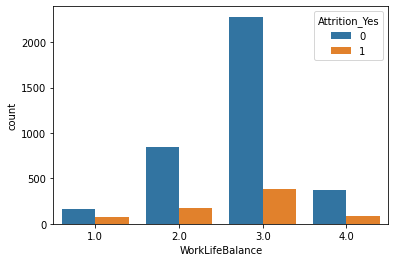

In [43]:
sns.countplot(emp_df['WorkLifeBalance'], hue=emp_df['Attrition_Yes'], data=emp_df)

**Observation** : Employees with poor work-life balance are more likely to leave

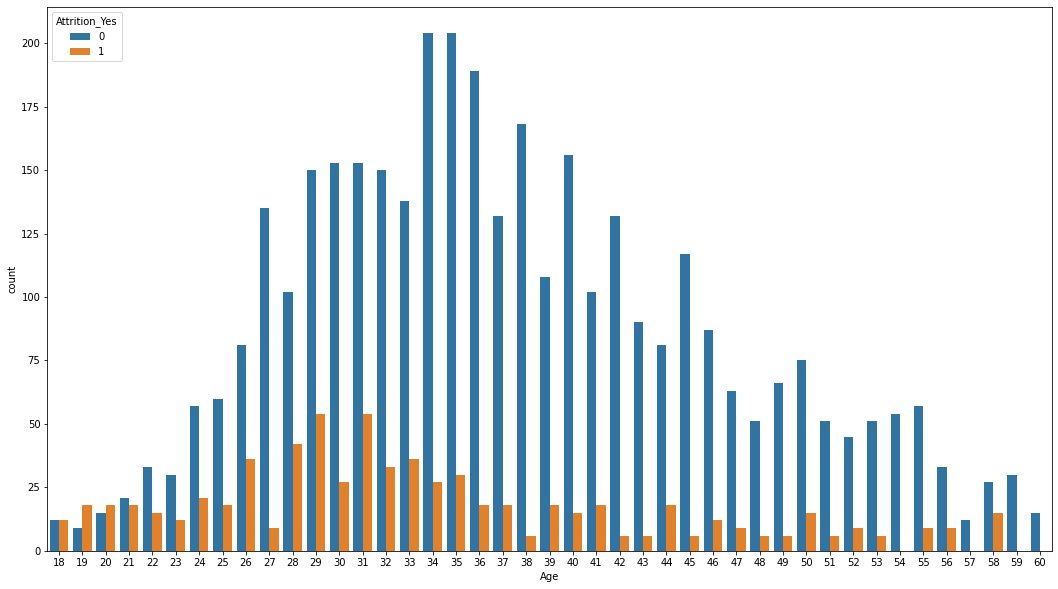

In [44]:
plt.figure(figsize=(18,10))
sns.countplot(emp_df['Age'], hue=emp_df['Attrition_Yes'], data=emp_df)

# Splitting the data for training and testing

In [36]:
X = emp_df.iloc[:, :-1].values
y = emp_df.iloc[:, -1].values

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

# Handling Missing Values

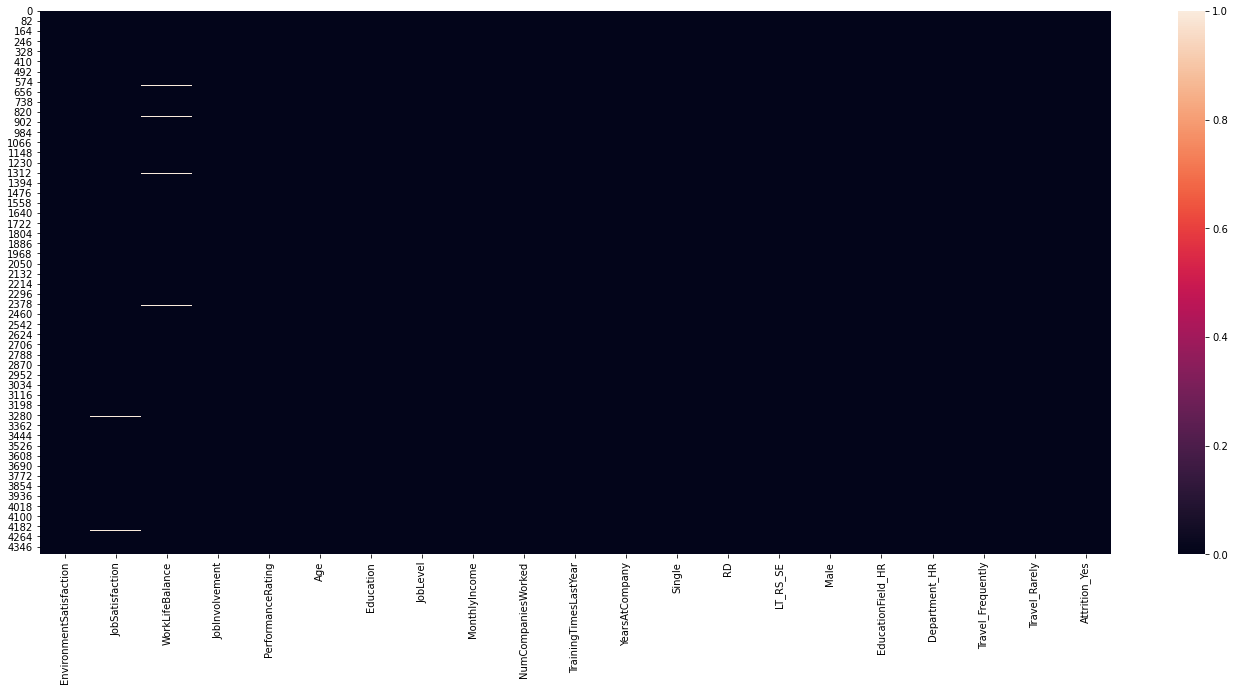

In [45]:
plt.figure(figsize=(24,10))
sns.heatmap(emp_df.isnull())

In [47]:
for col in ['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'NumCompaniesWorked']:
  print("Column : ", col)
  print("Mean : ", emp_df[col].mean())
  print("Mode : ", emp_df[col].mode())
  print("Unique values : ", emp_df[col].unique())
  print("Index : ", emp_df.columns.get_loc(col))

Column :  EnvironmentSatisfaction
Mean :  2.7236031927023947
Mode :  0    3.0
dtype: float64
Unique values :  [ 3.  2.  4.  1. nan]
Index :  0
Column :  JobSatisfaction
Mean :  2.728246013667426
Mode :  0    4.0
dtype: float64
Unique values :  [ 4.  2.  1.  3. nan]
Index :  1
Column :  WorkLifeBalance
Mean :  2.7614364135407135
Mode :  0    3.0
dtype: float64
Unique values :  [ 2.  4.  1.  3. nan]
Index :  2
Column :  NumCompaniesWorked
Mean :  2.6948303347756775
Mode :  0    1.0
dtype: float64
Unique values :  [ 1.  0.  3.  4.  2.  7.  9.  5.  6.  8. nan]
Index :  9


**Comment **: 
- We will impute missing values of 'EnvironmentSatisfaction', 'WorkLifeBalance', 'NumCompaniesWorked' with most frequent values 
- We will impute missing values of 'JobSatisfaction' with const. 3

- This features are not continuous, hence chose whole number(mode) than fraction(mean)

**Imputing missing values with SimpleImputer**

- SimpleImputer takes 2-D numpy array
```
X_train[:, 0].reshape(X_train[:, 0].shape[0], 1) is a 2-D array made from X_train[:, 0] which is a 1-D array
```
- shape of the 2-D array is (n, 1) and shape of 1-D array is (n,)
- array.shape[0] = no. of rows
- array.shape[1] = no. of cols, this gives error for 1-D array
- Missing value imputation is done after splitting the data in training and test set.
- Note that fit is done only once with training set, not on complete set to avoid data leakage
- training and test set both are transformed with the same value(for eg. mean) calculated by fit() method applied on training set



In [48]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer_const = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=3)

# for 'EnvironmentSatisfaction', 'WorkLifeBalance', 'NumCompaniesWorked'

for col in [0, 2, 9]:
    imputer.fit(X_train[:, col].reshape(X_train[:, col].shape[0], 1))
    X_train[:, col] = imputer.transform(X_train[:, col].reshape(X_train[:, col].shape[0], 1))[:, 0]
    X_test[:, col] = imputer.transform(X_test[:, col].reshape(X_test[:, col].shape[0], 1))[:, 0]

# for 'JobSatisfaction'
col = 1
imputer_const.fit(X_train[:, col].reshape(X_train[:, col].shape[0], 1))
X_train[:, col] = imputer_const.transform(X_train[:, col].reshape(X_train[:, col].shape[0], 1))[:, 0]
X_test[:, col] = imputer_const.transform(X_test[:, col].reshape(X_test[:, col].shape[0], 1))[:, 0]

Verifying if missing values are correctlty filled up.

In [49]:
for i in [0, 1, 2, 9]:
    array_sum = np.sum(X_train[:,i])
    array_has_nan = np.isnan(array_sum)
    print(array_has_nan)
    
    array_sum = np.sum(X_test[:,i])
    array_has_nan = np.isnan(array_sum)
    print(array_has_nan)

False
False
False
False
False
False
False
False


# Scaling the data

- Scaling the data is required for Logistic Regression. 
- Decision Tree Classifier and Random Forest do not need Scaled data.
- Scaling is done only on the independant columns.

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Importing Modules for Performance Evaluation** 

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.8458049886621315
[[726  14]
 [122  20]]


# Decision Tree Classification


In [53]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9886621315192744
[[734   6]
 [  4 138]]


# Random Forest Classification

In [54]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9943310657596371
[[740   0]
 [  5 137]]


# Conclusion

- We got 84.5 % accuracy with our Logistic Regression Model
- Decision Tree Classifier predicted result with 98.8% accuracy.
- We have been able to achieve maximum of 99.4% accuracy with Random Forest Classifier!



**Note** :

- It is important to encode all the categorical columns before starting to train the classification models. Otherwise it throws error similar to "ValueError: could not convert string to float: b"
- Reference Link - https://stackoverflow.com/questions/38108832/passing-categorical-data-to-sklearn-decision-tree#:~:text=question%20is%20misleading.-,As%20it%20stands%2C%20sklearn%20decision%20trees%20do%20not%20handle%20categorical,()%20will%20treat%20as%20numeric.

- This was observed for Logistic Regression, Decision Tree and Random Forest